In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import shutil
import csv
import os

In [71]:
# 這個是讀取一個csv檔案的程式 輸出結果為包含溫度和心博的圖表
# 請分別輸入病人csv檔案,時間間隔,開始時間
# 檔案名稱請附上結尾.csv
# 時間間隔單位為分鐘
# 開始時間預定為早上8.
# ex : visualization('01A5.csv', 30)

def visualization_HR(file, time_step, start=8):
    df = pd.read_csv(file, header = None)
    df[0] = [datetime.datetime.strptime(i, '%Y/%m/%d').date() for i in df[0].values]
    df[1] = [datetime.datetime.strptime(i, '%H:%M:%S').time() for i in df[1].values]

    date_list = np.sort(list(dict.fromkeys(df[0].values)))
    
    today_date = date_list[-1] # 定義今天時間
    time_zone = file[:4] + '_' + str(today_date) + ' box+hp plot' 
    
    date = df[0].values
    d_filter = (date>=today_date)&(date<today_date+datetime.timedelta(days = 1))
    
    data = (df[3].values)[d_filter]/100 # each date
    time = (df[1].values)[d_filter] # each hour
    HP = (df[2].values)[d_filter]
#     HP = [int(i) for i in HP]
    print (data)
    print (HP)
   
    start_datetime = datetime.datetime.combine(today_date, datetime.time(start,0))
    end_datetime = datetime.datetime.combine(today_date, time[-1])
    datetime_list = [(start_datetime+i*datetime.timedelta(minutes = time_step)) for i in range(int(np.floor((end_datetime-start_datetime)/datetime.timedelta(minutes = time_step))))]
    
    each_hour = []
    each_hp = []
    for t_idx in range(len(datetime_list)):
        t_filter = (time>=datetime_list[t_idx].time()) & (time<(datetime_list[t_idx]+datetime.timedelta(minutes = time_step)).time())
        hp = HP[(t_filter)&(HP>0)&(HP<200)]
        tmp = data[(t_filter)&(data>25)&(data<45)]
        each_hp.append(hp)
        each_hour.append(tmp)
    print (each_hp)
        
    plt.figure(figsize = (10,5))
    box_plot = plt.boxplot(each_hour, flierprops = dict(markerfacecolor = 'b', marker = '.'))
    baseline = plt.plot(np.linspace(1, time_step, time_step), [35 for i in range(time_step)], 'g:')
    l1 = plt.legend(baseline, ['baseline'], loc='lower right')
    
#     將medians, q1, q3分別記錄下來 並存成csv
    med_data = [] # med_data = [['date', 'time', 'q1', 'q3', 'medians']]
    for q_idx in range(len(box_plot['medians'])):
        med = box_plot['medians'][q_idx].get_ydata()
        q1 = box_plot['whiskers'][2*q_idx].get_ydata()
        q3 = box_plot['whiskers'][2*q_idx+1].get_ydata()
        tmp = [str(today_date), q_idx+1, q1[0], q3[0], med[0]]
        med_data.append(tmp)
#     存成csv檔
#     with open(file[:4] + '_medians.csv' , 'w', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         med_df = pd.DataFrame(med_data)
#         writer.writerows(med_data)

#     讀取耳溫的csv檔 並在圖表上標點
#     sick_hour, sick_tmp = read_tmp_to_list('01A5_ear.csv', today_date, datetime.time(start, 0), time_step, 34)
#     sick_points = plt.scatter(sick_hour, sick_tmp,  marker = 'D', color='r' )
#     plt.legend([sick_points], ['sick points'], loc='upper right')

#     美化圖表
    plt.gca().add_artist(l1)
    time_tag = [datetime.datetime.strftime(i, "%H:%M") for i in datetime_list]
    plt.xticks(np.linspace(1, time_step, time_step), time_tag, rotation='vertical')
    plt.xlabel('Hours')
    plt.ylabel('Temperature')
    plt.suptitle(time_zone)
#     plt.savefig( time_zone + '.png', dpi = 300)
    plt.show()


[22.04 22.01 22.02 ... 33.01 33.03 33.04]
[ 0  0  0 ... 67 71 68]
[array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 83,  91,  92,  95,  91,  91,  90,  91,  92,  88,  87,  90,  90,
        87,  86,  83,  78,  82,  84,  92,  97,  96,  99, 100,  99, 101,
       105, 106, 107, 105, 103, 102, 100, 100, 104,  92,  88,  86,  89,
        88,  87,  85,  85,  82,  85,  87,  83,  89,  84,  88,  87,  85,
        84,  87,  89,  88,  89,  90,  89,  89,  91,  81,  87,  89,  89,
        93,  92,  90,  89,  91,  90,  87,  87,  87,  88,  89,  90,  90,
        88,  88,  90,  86,  94,  94,  91,  90,  91,  87,  87,  91,  94,
        95,  89,  80,  86,  91,  85,  89,  87

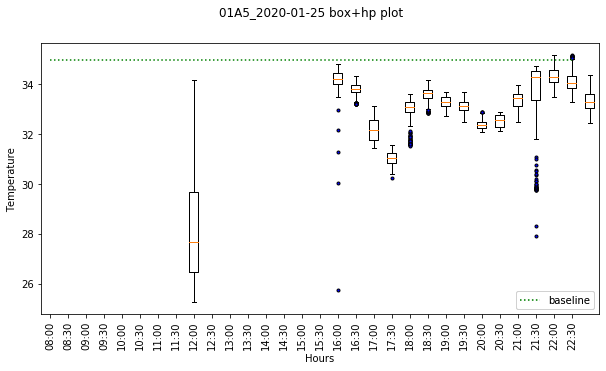

In [72]:
visualization_HR('01A5.csv', 30)